<a href="https://colab.research.google.com/github/The-Alchemists/Caltech-50-on-50-challenge/blob/master/Chaitanya_Caltech_50_on_50_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1:

Given a list of numbers, return whether any two sums to k.
For example, given [10, 15, 3, 7] and k of 17, return true since 10 + 7 is 17.
Bonus: Can you do this in one pass?

In [ ]:
def question1(listofnum,k):
    for i in range(len(listofnum)-1):
        for j in range(i+1,len(listofnum)):
            if listofnum[i] + listofnum[j] == k:
                #For debugging
                # print(listofnum[i],listofnum[j]) 
                return True
    else:
        return False

In [ ]:
question1([10,15,3,7],10)

True

### Question 2

This problem was asked by Uber.

Given an array of integers, return a new array such that each element at index i of the new array
is the product of all the numbers in the original array except the one at i.

For example, if our input was [1, 2, 3, 4, 5], the expected output would be [120, 60, 40, 30, 24].

If our input was [3, 2, 1], the expected output would be [2, 3, 6].
Follow-up: what if you can't use division?

In [ ]:
import numpy as np

In [ ]:
def question2(thelist):
    l = []
    for i in range(len(thelist)):
        temp = thelist.pop(0)
        v = np.prod(thelist)
        thelist.append(temp)
        # print(thelist)
        l.append(v)
    return(l)   

In [ ]:
question2([3,2,1])

[2, 3, 6]

### Question 3

This problem was asked by Google.

Given the root to a binary tree, implement serialize(root), which serializes the tree into a string,
and deserialize(s), which deserializes the string back into the tree.

#### Manish's Method

In [ ]:
import json

In [ ]:
#creating a tree 
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
    
    def __repr__(self):
        return str(self.data)

In [ ]:
def serialize(root):
    if not root:
        return None

    serialized_tree = dict()
    serialized_l = serialize(root.left)
    serialized_r = serialize(root.right)

    serialized_tree['data'] = root.data
    if serialized_l:
        serialized_tree['left'] = serialized_l
    if serialized_r:
        serialized_tree['right'] = serialized_r

    return json.dumps(serialized_tree)


def deserialize(s):
    serialized_tree = json.loads(s)

    node = Node(serialized_tree['data'])
    if 'left' in serialized_tree:
        node.left = deserialize(serialized_tree['left'])
    if 'right' in serialized_tree:
        node.right = deserialize(serialized_tree['right'])

    return node,serialized_tree

In [ ]:
a = Node('a')
b = Node('b')
c = Node('c')
d = Node('d')
e = Node('e')
f = Node('f')
g = Node('g')
a.left = b
a.right = c
b.left = d
b.right = e
c.left = f
c.right = g

serialized_a = serialize(a)
print(serialized_a)

deserialized_a,s = deserialize(serialized_a)
# str(deserialized_a) == "a"
print(s)

{"data": "a", "left": "{\"data\": \"b\", \"left\": \"{\\\"data\\\": \\\"d\\\"}\", \"right\": \"{\\\"data\\\": \\\"e\\\"}\"}", "right": "{\"data\": \"c\", \"left\": \"{\\\"data\\\": \\\"f\\\"}\", \"right\": \"{\\\"data\\\": \\\"g\\\"}\"}"}
{'data': 'a', 'left': '{"data": "b", "left": "{\\"data\\": \\"d\\"}", "right": "{\\"data\\": \\"e\\"}"}', 'right': '{"data": "c", "left": "{\\"data\\": \\"f\\"}", "right": "{\\"data\\": \\"g\\"}"}'}


### Question 4

This problem was asked by Nvidia.

Given an array of integers, find the first missing positive integer in linear time and constant
space. 

In other words, find the lowest positive integer that does not exist in the array. The array
can contain duplicates and negative numbers as well.

For example, the input [3, 4, -1, 1] should give 2. The input [1, 2, 0] should give 3.
You can modify the input array in-place.

In [ ]:
def question4(thelist): 
    a = thelist
    i = 1
    while True:
        if i not in a:
            return i
        i+=1      

In [ ]:
question4([-10,-20,-30])

1

### Question 5

This problem was asked by Jane Street.
cons(a, b) constructs a pair, and car(pair) and cdr(pair) returns the first and last element of that
pair. For example, car(cons(3, 4)) returns 3, and cdr(cons(3, 4)) returns 4.
Given this implementation of cons:

    def cons(a,b):
        return lambda f:f(a,b)

Implement car and cdr.

In [ ]:
def cons(a,b):
  return lambda f:f(a,b)

In [ ]:
def car(function):
  return function(lambda x,y:x)

def cdr(function):
  return function(lambda x,y:y)

In [ ]:
print(car(cons(1,2)))
print(cdr(cons(1,2)))

1
2


### Question 6

This problem was asked by Google.

An XOR linked list is a more memory efficient doubly linked list. Instead of each node holding next and prev fields, it holds a field named both, which is an XOR of the next node and the previous node. Implement an XOR linked list; it has an add(element) which adds the element to the end, and a get(index) which returns the node at index. 

If using a language that has no pointers (such as Python), you can assume you have access to get_pointer and dereference_pointer functions that converts between nodes and memory addresses.

#### Manish's Method

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.both = id(data)

    def __repr__(self):
        return str(self.data)

In [ ]:
class LinkedList:

  def __init__(self, node):
    self.head = node
    self.tail = node 
    self.head.both = 0        # is this Node.both ?
    self.tail.both = 0

  def add(self, element):
    self.tail.both ^= id(element.data)
    element.both, self.tail = id(self.tail.data), element 
     
  def get(self, index):
    prev_node_add = 0
    result = self.head
    for i in range(index):
      nxt_node_add = prev_node_add ^ result.both
      prev_node_add = id(result.data)
      result = id_map[nxt_node_add]   # Can we not use dictionary here but outside ?
    return result.data

In [ ]:
a = Node("a")
b = Node("b")
c = Node("c")
d = Node("d")
e = Node("e")

id_map = dict()
id_map[id("a")] = a
id_map[id("b")] = b
id_map[id("c")] = c
id_map[id("d")] = d
id_map[id("e")] = e

In [ ]:
llist = LinkedList(c)
llist.add(d)
llist.add(e)
llist.add(a)

In [ ]:
llist.get(3)

'a'

### Question 7

This problem was asked by Facebook.

Given the mapping a = 1, b = 2, ... z = 26, and an encoded message, count the number of ways it can be decoded. For example, the message '111' would give 3, since it could be decoded as 'aaa', 'ka', and 'ak'. 

You can assume that the messages are decodable. For example, '001' is not allowed.

#### Manish's Method

In [ ]:
def char(code):
    code = int(code)
    return 0 if code > 26 or code < 1 else 1

def get_message_c(code):
    code_string = str(code)
    if len(code_string) == 1:
        count = 1
    elif len(code_string) == 2:
        count = 1 + char(code)
    else:
        count = get_message_c(code_string[1:])
        if char(code_string[:2]):
            count += get_message_c(code_string[2:])

    return count



In [ ]:
get_message_c(111)

3

### Question 8

This problem was asked by Google.

A unival tree (which stands for "universal value") is a tree where all nodes under it have the same value. Also if the node does not have a child node then that is also considered as a unival Node.

Given the root to a binary tree, count the number of unival subtrees.

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
    def __repr__(self):
        return str(self.data)

In [ ]:
# 2 main test cases:
# First if the root and both its childs are same then +1
# Second if the node has not childs then +1. This goes for every leaf node.
def traverse(Root):
    # We check if the node has children or not. If he dosent then this is the last of its node
    count = 0
    #
    if Root.left and Root.right:
        count += traverse(Root.left)
        count += traverse(Root.right)
        if Root.data == Root.right.data == Root.left.data:
            count += 1
    elif Root.left and not Root.right:
        count += traverse(Root.left)
        if Root.data == Root.left.data:
            count += 1
    elif Root.right and not Root.left:
        count += traverse(Root.right)
        if Root.data == Root.right.data:
            count += 1
    else:
        count += 1
    return count

##### Problem 1

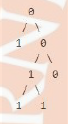

Answer : 5

In [ ]:
a = Node(0)
b = Node(1)
c = Node(0)
d = Node(1)
e = Node(0)
f = Node(1)
g = Node(1)


a.left = b
a.right = c
c.left = d
c.right = e
d.left = f
d.right =g


print(traverse(a))

5


##### Problem 2

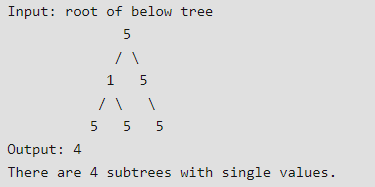

In [ ]:
a = Node(5)
b = Node(1)
c = Node(5)
d = Node(5)
e = Node(5)
f = Node(5)
# g = Node(1)
# h = Node(1)


a.left = b
a.right = c
b.left = d
b.right = e
c.right = f
# e.left = h

print(traverse(a))

4


##### Problem 3

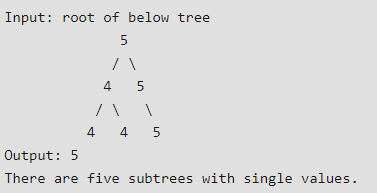

In [ ]:
a = Node(5)
b = Node(4)
c = Node(5)
d = Node(4)
e = Node(4)
f = Node(5)

a.left = b
a.right = c
b.left = d
b.right = e
c.right = f

print(traverse(a))

5


### Question 9

This problem was asked by Airbnb.

Given a list of integers, write a function that returns the largest sum of non-adjacent numbers. Numbers can be 0 or negative.

For example, [2, 4, 6, 8] should return 12, since we pick 4 and 8. [5, 1, 1, 5] should return 10, since we pick 5 and 5.

#### Chaitanya's

In [ ]:
def question9(arr):
    temp = list()
    for i in range(len(arr)-2):
        for j in range(i+2,len(arr)):
            temp.append(arr[i]+arr[j])
    return max(temp)

In [ ]:
question9([5,5,10,100,10,5])

105

#### Manish's

In [ ]:
def get_largest(array):
  prev, largest = 0, 0
  print ("value:{}; prev: {}; largest:{}".format(array[0], prev, largest))
  for value in array:
    prev, largest = largest, max(largest, prev + value)
    print ("value:{}; prev: {}; largest:{}".format(value, prev, largest))
  return largest

print(get_largest([5, 5, 10, 100, 10, 5]))

value:5; prev: 0; largest:0
value:5; prev: 0; largest:5
value:5; prev: 5; largest:5
value:10; prev: 5; largest:15
value:100; prev: 15; largest:105
value:10; prev: 105; largest:105
value:5; prev: 105; largest:110
110


### Question 10

This problem was asked by Apple.

Implement a job scheduler which takes in a function f and an integer n, and calls f after n milliseconds.

In [ ]:
import time

In [ ]:
def question10(function,miliseconds):
    time.sleep(miliseconds//1000)
    return function

In [ ]:
def dummy(a,b):
    return a+b

In [ ]:
question10(dummy(10,20),2000)

30

### Question 11

This problem was asked by Twitter.

Implement an autocomplete system. That is, given a query string s and a set of all possible query strings, return all strings in the set that have s as a prefix.

For example, given the query string de and the set of strings [dog, deer, deal], return [deer, deal].

Hint: Try preprocessing the dictionary into a more efficient data structure to speed up queries.

In [ ]:
# What the above Hint Specifies is that use a tree to preprocess the words
def question11(query_string,possible_string):
    final_list = list()
    for i in possible_string:
        if i.startswith(query_string):
            final_list.append(i)
    return final_list

In [ ]:
question11('de',['dog','deer','deal'])

['deer', 'deal']

### Question 12

This problem was asked by Amazon.

There exists a staircase with N steps, and you can climb up either 1 or 2 steps at a time. Given N, write a function that returns the number of unique ways you can climb the staircase. The order of the steps matters.
For example, if N is 4, then there are 5 unique ways:

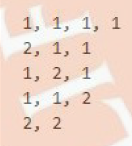

What if, instead of being able to climb 1 or 2 steps at a time, you could climb any number from a set of positive integers X? For example, if X = {1, 3, 5}, you could climb 1, 3, or 5 steps at a time.

In [ ]:
def question12(n):
    if n <= 1:
        return 1
    return question12(n-1) + question12(n-2)

In [ ]:
question12(4)

5

### Question 13

This problem was asked by Amazon.

Given an integer k and a string s, find the length of the longest substring that contains at most k distinct characters.

For example, given s = "abcba" and k = 2, the longest substring with k distinct characters is "bcb".

In [ ]:
def question13(s,k):
    dummy = ''
    for i in s:
        if i == dummy

In [ ]:
question13('abcba',4)

'abcba'

### Question 14

This problem was asked by Google.

The area of a circle is defined as r^2. Estimate \pi to 3 decimal places using a Monte Carlo method.

Hint: The basic equation of a circle is x^2 + y^2 = r^2.

This is a simulation without graphics:

1. Initialize number of points
2. Generate random point x between the number of points.
3. Generate random point y between the number of points.
4. Calculate d = x*x + y*y.
5. If d <= r**2, increment circle_points.
6. Increment square_points.
7. Increment interval.
8. If finished interval, Calculate pi = 4*(circle_points/square_points or number of points).
9. Terminate.

In [ ]:
import numpy.random as rn
import math

In [ ]:
def question14(number_of_drops,radius = 1):
    d = radius**2
    point_in_circle = 0
    for i in range(0,number_of_drops):
        x = rn.uniform(-radius,radius)
        y = rn.uniform(-radius,radius)
        dist = x**2+y**2
        if dist<=d:
            point_in_circle += 1
    return f"Final Estimation Of Pi: {4*(point_in_circle/number_of_drops):.3f}. Actual Estimation of Pi: {math.pi:.3f}"

In [ ]:
question14(500000,1)

'Final Estimation Of Pi: 3.141. Actual Estimation of Pi: 3.142'

### Question 15

This problem was asked by Facebook.

Given a stream of elements too large to store in memory, pick a random element from the
stream with uniform probability.

In [1]:
import random

Hint:

Let’s work through the problem of uniformly picking a random element from a gigantic stream. This is a common interview question at companies like Google and Facebook.

Naively, we could process the stream and store all the elements we encounter in a list, find its size, and pick a random element from [0, size - 1]. The problem with this approach is that it would take O(N) space for a large N.

Instead, let’s attempt to solve using loop invariants. On the ith iteration of our loop to pick a random element, let’s assume we already picked an element uniformly from [0, i - 1]. In order to maintain the loop invariant, we would need to pick the ith element as the new random element at 1 / (i + 1) chance. For the base case where i = 0, let’s say the random element is the first one. Then we know it works because

1. For i = 0, we would’ve picked uniformly from [0, 0].
2. For i > 0, before the loop began, any element K in [0, i - 1] had 1 / i chance of being chosen as the random element. We want K to have 1 / (i + 1) chance of being chosen after the iteration. This is the case since the chance of having being chosen already but not getting swapped with the ith element is
1 / i * (1 - (1 / (i + 1))) which is 1 / i * i / (i + 1) or 1 / (i + 1)

#### Method 1

In [2]:
def question15_method1(Huge_stream_of_list):
    return random.choice(Huge_stream_of_list)

In [11]:
huge = [i for i in range(1,1000001)]
question15_method1(huge)

41125

#### Method 2

In [5]:
def question15_method2(big_stream):
    random_element = None

    for i, e in enumerate(big_stream):
        if i == 0:
            random_element = e
        elif random.randint(1, i + 1) == 1:
            random_element = e
    return random_element

In [8]:
question15_method2(huge)

553898